# Explorando sequências do promoters_data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

from collections import Counter




### Utils

In [3]:
def ler_arquivo_txt(caminho_arquivo):

    # Abre o arquivo no modo de leitura
    with open(caminho_arquivo, 'r') as arquivo:
      # Lê o conteúdo do arquivo linha por linha
      linhas = arquivo.readlines()

    # Remove caracteres de quebra de linha das linhas
    linhas_sem_quebra = [linha.strip() for linha in linhas]

    return linhas_sem_quebra

def countSymbolsSeq(plt, columnName, myDataFrame, shouldPrintText = False, shouldPrinHist = True):
    listOfSeqs = myDataFrame[columnName].values.tolist()
    counter = Counter()
    for seq in listOfSeqs:
        counter.update(seq)
    countMap = dict(counter)
    symbols = list(countMap.keys())
    counts = list(countMap.values())

    if(shouldPrintText):
        print(countMap)
    if(shouldPrinHist):
        plt.bar(symbols, counts)
        plt.title("Símbolos do dataset")
        plt.xlabel("Símbolo")
        plt.ylabel("Ocorrência")
        plt.show()

    return listOfSeqs


def countClasses(plt, columnName, myDataFrame, shouldPrintText = False, shouldPrinHist = True):
    classes = myDataFrame[columnName].values.tolist()
    counter = Counter(classes)
    countMap = dict(counter)
    symbols = list(countMap.keys())
    counts = list(countMap.values())

    if(shouldPrintText):
        print(countMap)
    if(shouldPrinHist):
        plt.bar(symbols, counts)
        plt.title("Classes do dataset")
        plt.xlabel("Classe")
        plt.ylabel("Ocorrência")
        plt.show()
    
    return classes

def countSeqSizes(plt, columnName, myDataFrame, shouldPrintText = False, shouldPrinHist = True):
    listOfSeqs = myDataFrame[columnName].values.tolist()
    listOfsizes = [len(x) for x in listOfSeqs]
    counter = Counter(listOfsizes)
    countMap = dict(counter)
    symbols = list(countMap.keys())
    counts = list(countMap.values())

    if(shouldPrintText):
        print(countMap)
        print(max(listOfsizes))
        print(min(listOfsizes))
    if(shouldPrinHist):
        plt.bar(symbols, counts)
        plt.title("Tamanhos das Sequências do dataset")
        plt.xlabel("Tamanho")
        plt.ylabel("Ocorrência")
        plt.show()
    
    return listOfsizes

#### gerando CSV

In [4]:

lines = ler_arquivo_txt('H3k4me2.txt')
#dfLinesNum = len(lines)/3
i = 0
colNum = 3
tuples = []
while (i < len(lines)):

    sampleName = lines[i]
    sampleSeq = lines[i+1]
    sampleClass = lines[i+2]
    tuple = (sampleName, sampleSeq, len(sampleSeq), sampleClass)
    tuples.append(tuple)
    i = i + colNum
  
    

### criando data frame

In [10]:
df = pd.DataFrame(tuples, columns=['seqName', 'sequence', 'seqSize', 'classe'])
filteredDf = df.query('seqSize == 500')
filteredDf

,seqName,sequence,seqSize,classe
1,>iYAL068C_2263,CATGTAGTATTGGGCTAAGTGAGCTCTGATATCAGAGACGTAGACA...,500,0
2,>iYAL067W-A_2858,CTGAATTCAGTCTGCTTTAAACGGCTTCCGCGGAGGAAATATTTCC...,500,0
3,>iYAL067W-A_3010,TAGCCGCTGAGAAGCGGATGGTAATGAGACAAGTTGATATCAAACA...,500,0
4,>iYAL067W-A_3525,AGGGAAACAGTAAACAGTGAAAATTCTCTTGAGAACCAAAGTAAAC...,500,0
5,>iYAL067W-A_3619,GGTTTCCATACCTCCCCAGCATCATACATCTTTTTTCAAAGAAACT...,500,0
...,...,...,...,...
30678,>iYPR201W_941173,TTTTCTATTACGATGACGCAATGTTTCACTATGGCTTCAAATAATT...,500,1
30679,>iYPR201W_941415,GAATAATACCACTTATAACTCTATATTAATCCAAGTTCACCCTAAA...,500,1
30680,>iYPR201W_941752,ATTAGTAATGCTTTAAACCCAAGTATTGTAAGCCCGATGGAATAGC...,500,1
30681,>iYPR201W_941977,AAGAGGTGACATATAATGTTTCAAAATGGTGCCAGTATAAGTTTGG...,500,1


#### resample

In [12]:
df_majoritario = filteredDf[filteredDf.classe=='1']
df_minoritario = filteredDf[filteredDf.classe=='0']

df_majoritario_subamostrado = resample(df_majoritario, 
                                       replace=False, 
                                       n_samples=len(df_minoritario), 
                                       random_state=0)

df_balanceado = pd.concat([df_majoritario_subamostrado, df_minoritario])

{'C': 2382281, 'A': 3895685, 'G': 2379248, 'T': 3881786}


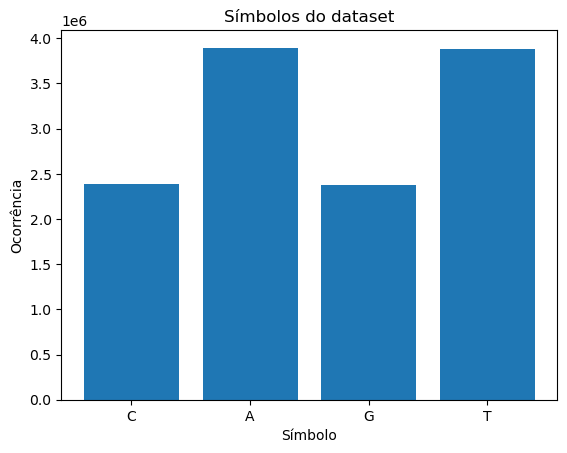

{500: 25078}
500
500


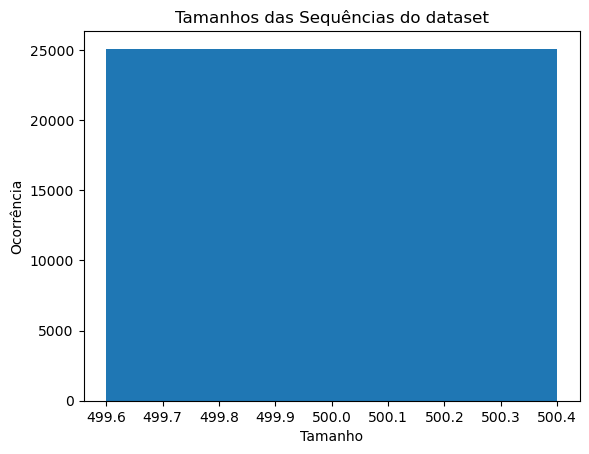

{'1': 12539, '0': 12539}


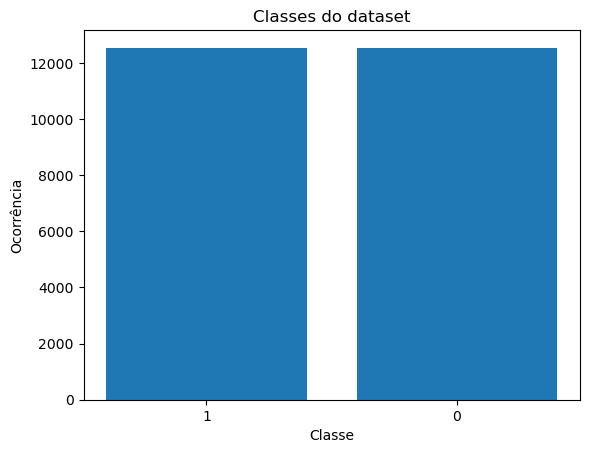

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1'

In [14]:
countSymbolsSeq(plt, 'sequence', df_balanceado, shouldPrintText=True, shouldPrinHist=True)
countSeqSizes(plt, 'sequence', df_balanceado, shouldPrintText=True, shouldPrinHist=True)
countClasses(plt, 'classe', df_balanceado, shouldPrintText=True, shouldPrinHist=True)

In [15]:
df_balanceado.to_csv('h3k4me2_csv.csv');